## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [4]:
raw_csv_data = pd.read_csv("dataset/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value']=df_comp.ftse

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

Text(0, 0.5, 'correlation')

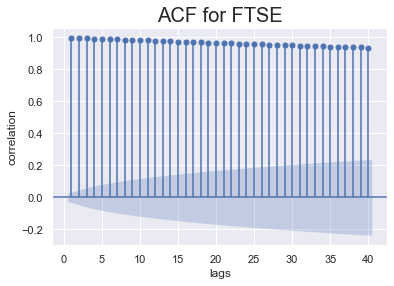

In [13]:
# the effect barely deteriorate over time
# the more lags we include (more complex model), the better we fit the data, the higher the test error could be
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF for FTSE', size=20)
plt.xlabel('lags')
plt.ylabel('correlation')

## The PACF

Text(0, 0.5, 'correlation')

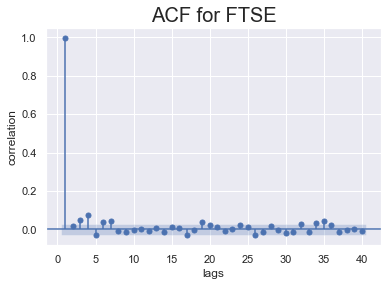

In [14]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('PACF for FTSE', size=20)
plt.xlabel('lags')
plt.ylabel('correlation')

## The AR(1) Model

In [21]:
# order=(1,0) 1=taking 1 past value that we wish to incorporate to our model; 0=Not taking any of the residual value into consideration
# when it's (1,0) it's called a simple, AR(1) Model
model_ar = ARMA(df.market_value, order=(1,0))

In [22]:
# The model always assume there's one constant in the model, even if it does not proved to be significant afterwards
results_ar = model_ar.fit()

In [23]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.600
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 04 Mar 2021   AIC                          55251.199
Time:                        01:45:27   BIC                          55270.764
Sample:                    01-07-1994   HQIC                         55258.055
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5070.4246    490.997     10.327      0.000    4108.088    6032.761
ar.L1.market_value     0.9985      0.001   1300.079      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [24]:
# The price two days ago, does not severely influence the price today -> not significant enough
model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.891
Method:                       css-mle   S.D. of innovations             59.250
Date:                Thu, 04 Mar 2021   AIC                          55251.783
Time:                        01:45:29   BIC                          55277.868
Sample:                    01-07-1994   HQIC                         55260.923
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5145.3654    488.042     10.543      0.000    4188.820    6101.911
ar.L1.market_value     0.9816      0.014     69.600      0.000       0.954       1.009
ar.L2.market_value     0.0169      0.014      1.196      0.232      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -59.1812           +0.0000j           59.1812            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Thu, 04 Mar 2021   AIC                          55241.742
Time:                        01:47:44   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    520.340      9.781      0.000    4069.793    6109.490
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_4 = ARMA(df.market_value, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 04 Mar 2021   AIC                          55217.130
Time:                        01:49:12   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    559.987      9.089      0.000    3992.087    6187.196
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [27]:
# mod1, mod2 = model1 and 2 you wanna compare the log-likelihood value; DF = degree of freedom
# get the p-value for chi-square
# most of the time we're just compating two time periods, so the DF can be default at 1
def LLR_test(mod1, mod2, DF=1):
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [29]:
# p < 0.05, it's significant, so including one more lag is a good idea
LLR_test(model_ar_2, model_ar_3)

0.001

In [30]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [31]:
model_ar_4 = ARMA(df.market_value, order=(4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print(LLR_test(model_ar_3, model_ar_4))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 04 Mar 2021   AIC                          55217.130
Time:                        01:57:38   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    559.987      9.089      0.000    3992.087    6187.196
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [32]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print(LLR_test(model_ar_4, model_ar_5))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Thu, 04 Mar 2021   AIC                          55214.697
Time:                        01:57:42   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    543.575      9.363      0.000    4024.255    6155.028
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [33]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print(LLR_test(model_ar_5, model_ar_6))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Thu, 04 Mar 2021   AIC                          55208.947
Time:                        01:57:45   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    565.155      9.006      0.000    3981.958    6197.325
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [34]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print(LLR_test(model_ar_6, model_ar_7))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Thu, 04 Mar 2021   AIC                          55201.799
Time:                        01:57:49   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    589.572      8.633      0.000    3934.102    6245.181
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [35]:
# The chi-square p-value is finally not signifcant
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_7.fit()
print(results_ar_8.summary())
print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Thu, 04 Mar 2021   AIC                          55201.799
Time:                        01:57:54   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    589.572      8.633      0.000    3934.102    6245.181
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [36]:
print(LLR_test(model_ar, model_ar_7, DF=6))

0.0


## The DF Test

## Analysing the Residuals

In [37]:
df['res_price'] = results_ar_7.resid

<ipython-input-37-0f110e8e009e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar_7.resid


In [39]:
df.res_price.mean()

0.3522463543065299

In [41]:
df.res_price.var()

4005.944863175956

In [42]:
# very stationary
sts.adfuller(df.res_price)

(-76.0746610897839,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.4150730252)

Text(0, 0.5, 'correlation')

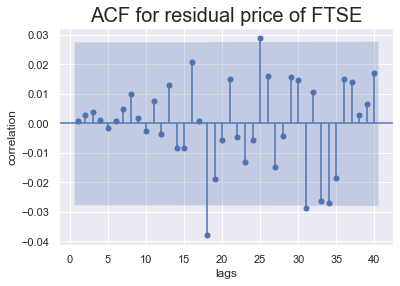

In [43]:
# most of the lines are in the blue region, this suggest that most of them are not significant, and that's the characteristc of white noises
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title('ACF for residual price of FTSE', size=20)
plt.xlabel('lags')
plt.ylabel('correlation')

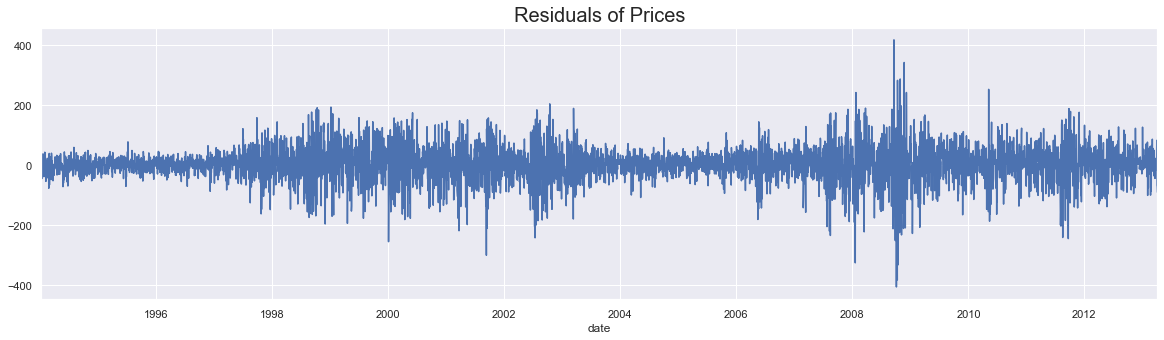

In [45]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('Residuals of Prices', size=20)
plt.show()